In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

df=pd.read_csv("IRIS_ Flower_Dataset.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [114]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [115]:
X = df.drop('species',axis=1)
y=df['species']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [223]:
df_model.fit(X_train, y_train)
y_pred = df_model.predict(X_test)

In [224]:
accuracy = accuracy_score(y_test, y_pred)

In [225]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


In [226]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [157]:
grid_search = GridSearchCV(estimator=df_model, param_grid=param_grid, cv=2)

In [158]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=150),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [251]:
print("Grid Search Results:")
print(pd.DataFrame(grid_search.cv_results_))

Grid Search Results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.107481      0.013521         0.009973        0.005955   
1         0.201110      0.003750         0.019027        0.003364   
2         0.332235      0.021640         0.031412        0.002123   
3         0.095973      0.003427         0.010142        0.004654   
4         0.212963      0.021474         0.019786        0.004154   
..             ...           ...              ...             ...   
103       0.172811      0.001178         0.014829        0.000797   
104       0.258150      0.004480         0.016000        0.000369   
105       0.085766      0.007649         0.007815        0.007815   
106       0.227755      0.008908         0.029032        0.001915   
107       0.301174      0.044814         0.032469        0.000289   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0              None                      1                       2   
1         

In [252]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [262]:
new_model=RandomForestClassifier(max_depth= 10, min_samples_leaf=4, min_samples_split=2, n_estimators=100)

In [263]:
new_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [264]:
newy_pred=new_model.predict(X_test)

In [265]:
new_accuracy=accuracy_score(y_test, newy_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")

Accuracy with Best Hyperparameters: 0.9736842105263158


In [231]:
#Same accuracy ?

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

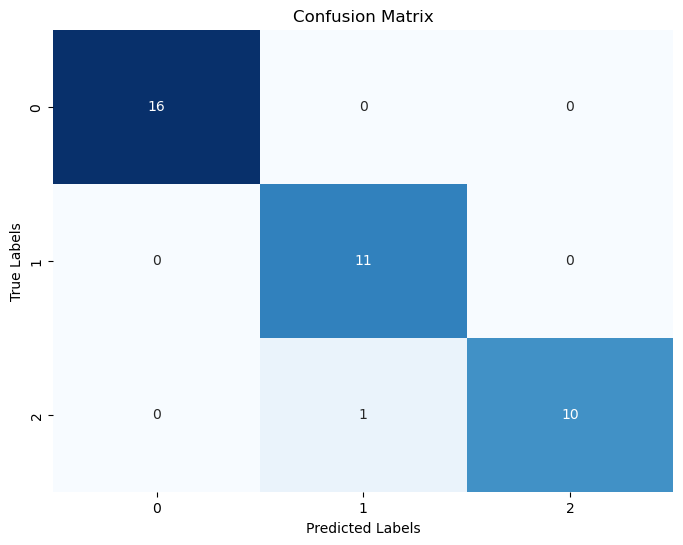

In [149]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

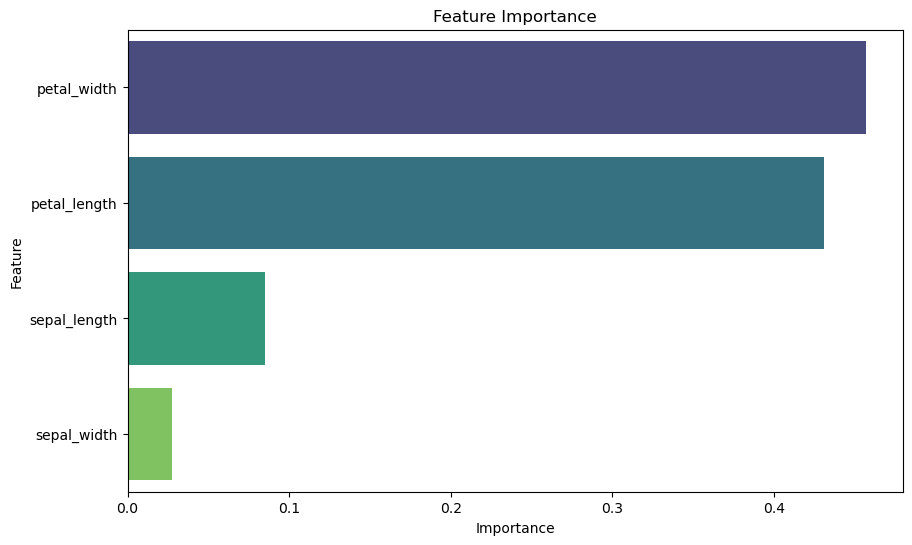

In [151]:
feature_importance = new_model.feature_importances_
feature_names = X.columns
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()
#Feature importance shows the importance of each feature, the more importance a feature has the more it contributed 
#to the model deicision making progress